/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2449401172.py:22: UserWarning: Glyph 37319 (\N{CJK UNIFIED IDEOGRAPH-91C7}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2449401172.py:22: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2449401172.py:22: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2449401172.py:22: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2449401172.py:22: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipyker

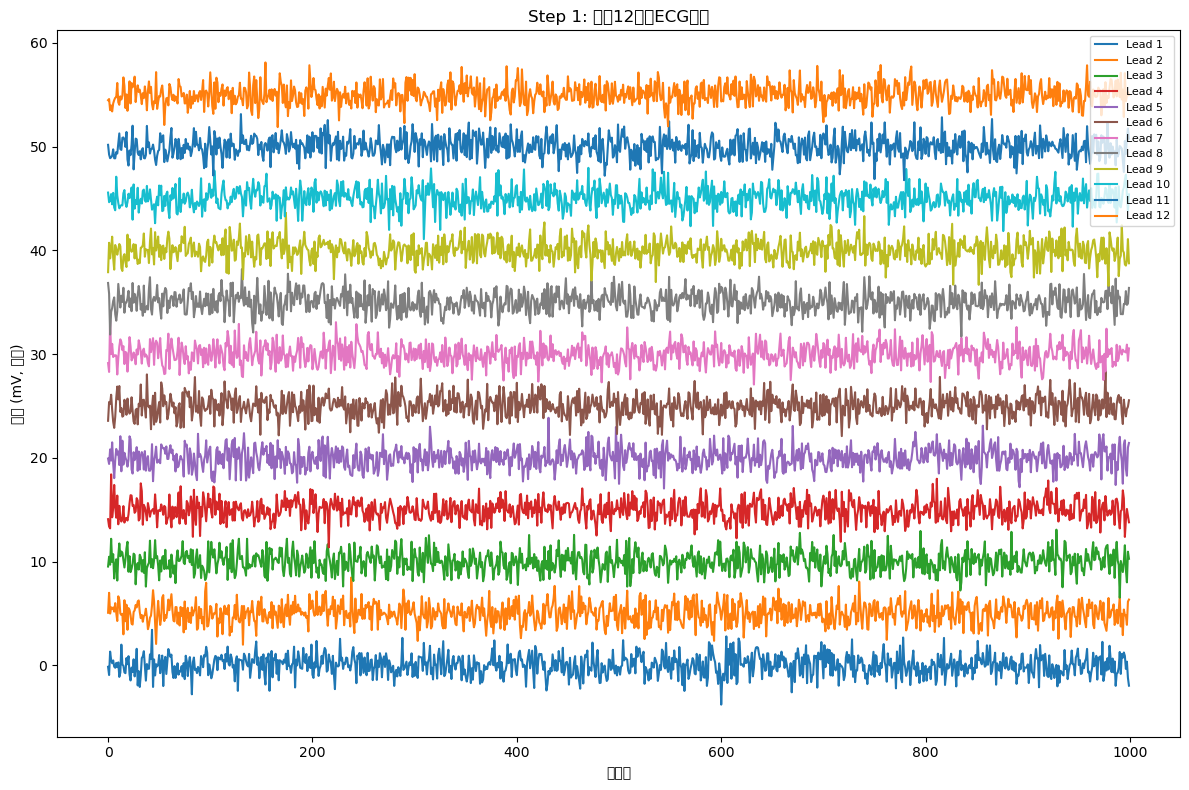

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
with open('ecg_dataset.json', 'r') as f:
    data = json.load(f)

# 选取一条样本
sample = data[0]
ecg_signal = np.array(sample['ecg_signal'])  # shape: [channels, signal_length]
label = sample['label']

# 可视化12导联信号
plt.figure(figsize=(12, 8))
for i in range(ecg_signal.shape[0]):
    plt.plot(ecg_signal[i] + 5*i, label=f'Lead {i+1}')  # 上下错开显示
plt.title('Step 1: 原始12导联ECG信号')
plt.xlabel('采样点')
plt.ylabel('电压 (mV, 假定)')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2483809247.py:23: UserWarning: Glyph 37319 (\N{CJK UNIFIED IDEOGRAPH-91C7}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2483809247.py:23: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2483809247.py:23: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2483809247.py:23: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2483809247.py:23: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-538B}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipyker

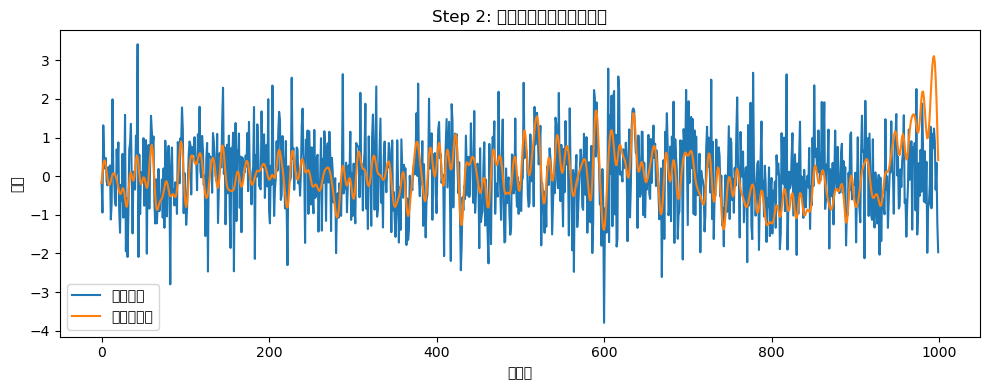

In [3]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

lead1 = ecg_signal[0]
fs = sample['sampling_rate']

# 带通滤波（0.5-40Hz）
filtered = bandpass_filter(lead1, 0.5, 40, fs)

plt.figure(figsize=(10, 4))
plt.plot(lead1, label='原始信号')
plt.plot(filtered, label='带通滤波后')
plt.title('Step 2: 信号预处理（带通滤波）')
plt.xlabel('采样点')
plt.ylabel('电压')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2382578946.py:25: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2382578946.py:25: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2382578946.py:25: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2382578946.py:25: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/2382578946.py:25: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipyker

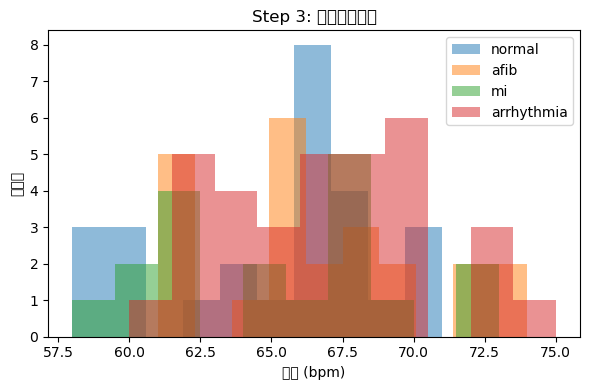

In [4]:
import pandas as pd

# 提取所有样本的特征
df = pd.DataFrame([
    {
        'label': s['label'],
        'mean_rr': s['features']['time_domain']['mean_rr'],
        'std_rr': s['features']['time_domain']['std_rr'],
        'heart_rate': s['features']['time_domain']['heart_rate'],
        'qrs_duration': s['features']['morphological']['qrs_duration'],
        'qt_interval': s['features']['morphological']['qt_interval'],
        'hf_lf_ratio': s['features']['frequency_domain']['hf_lf_ratio']
    }
    for s in data
])

# 可视化心率分布
plt.figure(figsize=(6,4))
for label in df['label'].unique():
    plt.hist(df[df['label']==label]['heart_rate'], bins=10, alpha=0.5, label=label)
plt.title('Step 3: 各类心率分布')
plt.xlabel('心率 (bpm)')
plt.ylabel('样本数')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/4012457984.py:20: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/4012457984.py:20: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/4012457984.py:20: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/4012457984.py:20: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipykernel_47881/4012457984.py:20: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/by/bvcpjs6125jbzjj8db4x4q9r0000gn/T/ipyker

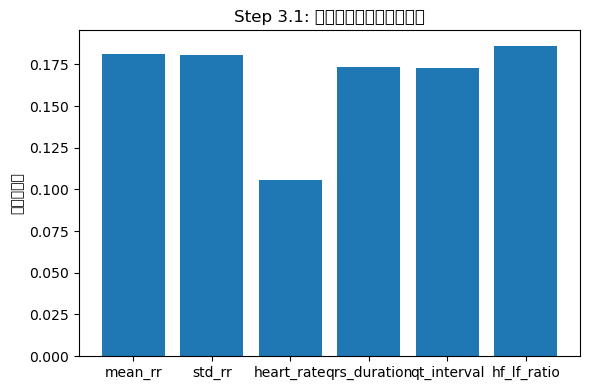

In [5]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)
y = df['label']

# 标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

# 随机森林特征重要性
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_enc)
importances = rf.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(X.columns, importances)
plt.title('Step 3.1: 特征重要性（随机森林）')
plt.ylabel('重要性分数')
plt.tight_layout()
plt.show()

Step 4: SVM分类报告
              precision    recall  f1-score   support

        afib       0.00      0.00      0.00         6
  arrhythmia       0.35      1.00      0.52         7
          mi       0.00      0.00      0.00         2
      normal       0.00      0.00      0.00         5

    accuracy                           0.35        20
   macro avg       0.09      0.25      0.13        20
weighted avg       0.12      0.35      0.18        20


/Users/shenqihailuo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shenqihailuo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shenqihailuo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/fo

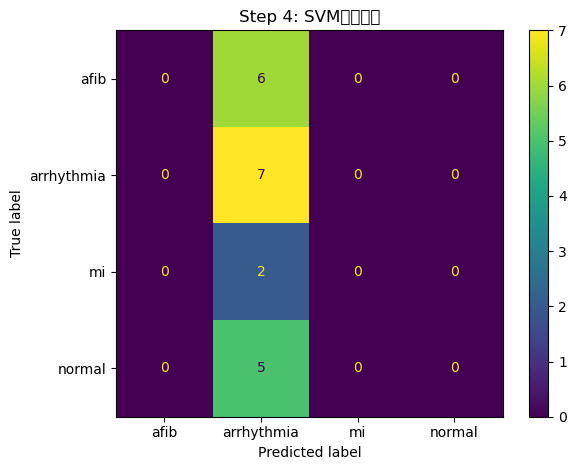

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Step 4: SVM分类报告")
print(classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_)
plt.title('Step 4: SVM混淆矩阵')
plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 只用lead1信号，shape: (样本数, 信号长度, 1)
X_cnn = np.array([np.array(s['ecg_signal'][0]) for s in data])
X_cnn = X_cnn[..., np.newaxis]
y_cnn = to_categorical(y_enc)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(16, 5, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_cnn.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16, validation_split=0.2)

# 可视化训练过程
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('Step 5: 1D-CNN训练过程')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('Step 6: 随机森林模型SHAP特征重要性')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'shap'